In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Seed for reproducibility
np.random.seed(0)

# Bottom U (class = 0)
x1 = np.linspace(-3, 3, 100)
y1 = x1**2 + np.random.normal(0, 0.5, 100)
c1 = np.zeros(100)

# Top inverted U (class = 1)
x2 = np.linspace(-3, 3, 100)
y2 = -x2**2 + np.random.normal(0, 0.5, 100) + 10
c2 = np.ones(100)

# Combine
X = np.concatenate([x1, x2])
Y = np.concatenate([y1, y2])
C = np.concatenate([c1, c2])

# Create DataFrame with correct column names
df = pd.DataFrame({
    'X': X,
    'Y': Y,
    'class': C
})

# Save file
df.to_csv('/content/ushape.csv', index=False)

In [5]:
df = pd.read_csv('/content/ushape.csv')

In [7]:
df.head()

,X,Y,class
0,-3.000000,9.882026,0.0
1,-2.939394,8.840115,0.0
2,-2.878788,8.776789,0.0
3,-2.818182,9.062595,0.0
4,-2.757576,8.538003,0.0


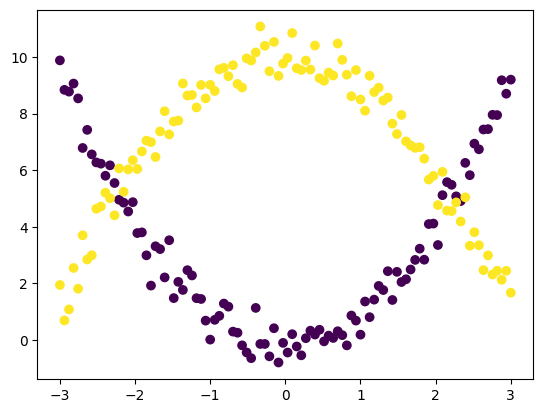

In [8]:
plt.scatter(df['X'],df['Y'],c=df['class'])

In [9]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [10]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [11]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2,kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.get_weights()

[array([[-0.06964336, -1.4695208 , -0.27232963,  0.5635297 ,  0.06836613,
          1.7020689 ,  1.3140408 , -0.3717897 , -0.01618279,  1.3884604 ],
        [-0.46693727, -0.192357  ,  1.0314875 , -0.31187516, -0.82555616,
          1.7195257 , -0.06937602, -0.5877907 ,  0.2384088 , -2.1154776 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.70617664,  0.17934282, -0.05937726, -0.21492603, -0.2556398 ,
         -0.17507309,  0.47125345, -0.2757485 ,  0.32877454,  0.52080935],
        [ 0.22036895,  0.10268895, -0.25834584,  0.32767215, -0.20165585,
          0.17541184, -0.32213622, -0.16864236,  0.5559679 , -0.09496974],
        [ 0.24077144,  0.6555248 ,  0.69635683,  0.5553717 ,  0.4341961 ,
          0.09407446, -0.5898448 , -0.76146144, -0.64257157,  0.76921433],
        [ 0.64171433,  0.3368034 ,  0.41794103, -0.572485  , -0.2983114 ,
          0.8059683 , -0.02170346, -0.35712612,  0.77094847,  0.44136742],
        [ 0.56950

In [13]:
initial_weights = model.get_weights()

In [15]:
initial_weights[0] = np.random.randn(2,10)*np.sqrt(1/2)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)
initial_weights[4] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[5] = np.zeros(model.get_weights()[5].shape)
initial_weights[6] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[7] = np.zeros(model.get_weights()[7].shape)
initial_weights[8] = np.random.randn(10,1)*np.sqrt(1/10)
initial_weights[9] = np.zeros(model.get_weights()[9].shape)

In [16]:
model.set_weights(initial_weights)

In [17]:
model.get_weights()

[array([[ 0.14642455,  0.37014425, -0.49454683,  0.6460876 , -0.4757307 ,
          0.09427465,  0.30186108, -0.00908589, -0.24907717,  0.57945037],
        [ 0.36910108,  0.8465906 , -0.2704586 ,  0.48907882,  0.25023448,
          0.7407547 , -0.2997399 , -2.4853163 , -0.94975525,  1.007985  ]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.07228398, -0.08148044,  0.01592862, -0.436461  , -0.08274797,
         -0.05672484, -0.2190733 ,  0.35981244, -0.05349222, -0.24157071],
        [-0.15750454, -0.11475625,  0.08347158, -0.19911025, -0.14934123,
         -0.47856677,  0.3502617 ,  0.05573159, -0.2973659 ,  0.29396355],
        [-0.33608526, -0.28030628,  0.6075833 , -0.14539537, -0.3443829 ,
          0.3112052 , -0.3665732 , -0.13804515,  0.31915113,  0.2255936 ],
        [-0.23023206,  0.2654784 ,  0.39181283, -0.56440455, -0.25177607,
         -0.44289005, -0.05829677, -0.4399339 ,  0.01146634, -0.25753766],
        [ 0.22052

In [18]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [19]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.5960 - loss: 0.7118 - val_accuracy: 0.0000e+00 - val_loss: 0.7452
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5998 - loss: 0.7063 - val_accuracy: 0.0000e+00 - val_loss: 0.7296
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6380 - loss: 0.6969 - val_accuracy: 0.0000e+00 - val_loss: 0.7182
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6398 - loss: 0.6928 - val_accuracy: 0.0000e+00 - val_loss: 0.7089
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6376 - loss: 0.6902 - val_accuracy: 0.0000e+00 - val_loss: 0.7003
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5687 - loss: 0.6876 - val_accuracy: 0.6250 - val_loss: 0.6933
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6822 - loss: 0.6832 - val_accuracy: 0.8000 - val_loss: 0.6886
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7513 - loss: 0.6803 - val_accuracy

In [20]:
model.get_weights()

[array([[ 1.3913232e-01,  3.3427116e-01, -6.1023092e-01,  9.6235770e-01,
         -7.2537422e-01, -7.9522445e-04,  6.0238552e-01, -1.4645267e-01,
         -1.5255585e-01,  7.2130531e-01],
        [ 4.0869117e-01,  8.7608075e-01, -2.6236135e-01,  5.1698768e-01,
          3.4842646e-01,  7.8463113e-01, -6.9815807e-02, -2.7510989e+00,
         -7.8880161e-01,  9.9580818e-01]], dtype=float32),
 array([ 0.26942366, -0.3224689 ,  0.14801066,  0.29040295, -0.19550416,
        -0.09002503,  0.31470186,  0.33718655, -0.17314596, -0.03921871],
       dtype=float32),
 array([[ 2.62907982e-01,  3.10010053e-02,  7.91704953e-02,
         -3.86626810e-01, -9.23716053e-02,  2.70898461e-01,
         -1.44344643e-01,  3.95852625e-01,  1.42084405e-01,
         -3.45365018e-01],
        [-2.43812334e-02, -1.55958347e-02,  1.26405969e-01,
         -1.11325651e-01, -1.49341226e-01, -1.46602988e-01,
          4.35300857e-01,  7.29563609e-02, -1.76234633e-01,
          2.13461518e-01],
        [-4.39476252e-0

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step


<Axes: >

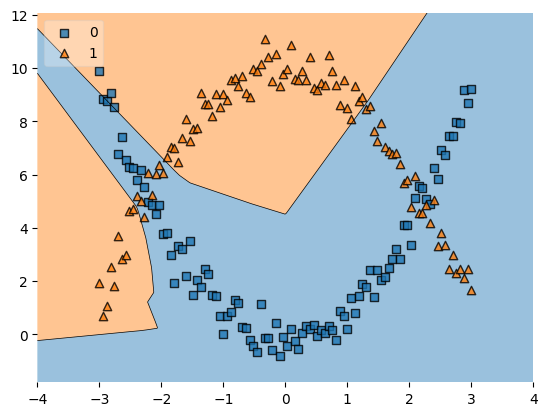

In [21]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)

In [22]:
(np.random.randn(10,10)*0.01).min()

np.float64(-0.02285479911924125)

In [23]:
(np.random.randn(10,10)*0.01).max()

np.float64(0.026518131412266124)